In [6]:
!pip install feature-engine
!pip install arcticdata=='1.4'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 29.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Analyse the factors that make the company employees exhausted and stressed**

In this project we will analyse the Employee Attrition data set, we will start by preprocessing, by analysing the columns one by one 
if it is numerical or categorical and unsegnificant for our output we drop it
if it is numerical and significant for our output we keep it 
if it is categorical and significant for our output we numerise it 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib as fs

import arcticdata.ExploratoryDataAnalysis as eda
import arcticdata.FeatureEngineering as fe
# import arcticdata.FeatureSelection as fs

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index,test_index in (split.split(df,df['Attrition'])):
    train = df.loc[train_index]
    test = df.loc[test_index]

train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,No,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,3,80,3,29,2,3,3,2,1,2
128,22,No,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,3,80,1,3,2,3,2,1,2,1
810,46,No,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,4,80,1,23,3,3,12,9,4,9
478,25,No,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,3,80,0,7,1,3,7,4,0,6
491,43,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,2,80,1,10,3,3,8,7,4,7


In [15]:
eda.missing_data(train).head()

,Total,Percent
Age,0,0.0
StandardHours,0,0.0
NumCompaniesWorked,0,0.0
Over18,0,0.0
OverTime,0,0.0


In [16]:
eda.missing_data(test).head()

,Total,Percent
Age,0,0.0
StandardHours,0,0.0
NumCompaniesWorked,0,0.0
Over18,0,0.0
OverTime,0,0.0


Age



The feature Age is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


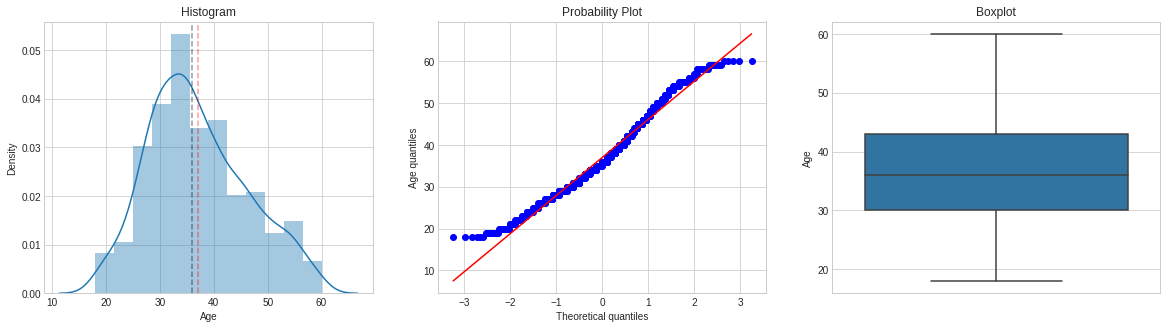

In [17]:
eda.feature_analysis(train,'Age')

In [18]:
test["AgeFreq"] = fe.discretization(train,test,variables=['Age'])['Age']
train["AgeFreq"] = fe.discretization(train,train,variables=['Age'])['Age']
test["AgeRange"] = fe.discretization(train,test,variables=['Age'],method="equalrange")['Age']
train["AgeRange"] = fe.discretization(train,train,variables=['Age'],method="equalrange")['Age']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange
1194,47,No,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,3,29,2,3,3,2,1,2,8,6
128,22,No,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,1,3,2,3,2,1,2,1,0,0
810,46,No,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,1,23,3,3,12,9,4,9,8,6


Attrition

The feature Attrition is CATEGORICAL

-Cardinality: 2
-Missing values in training set: 0


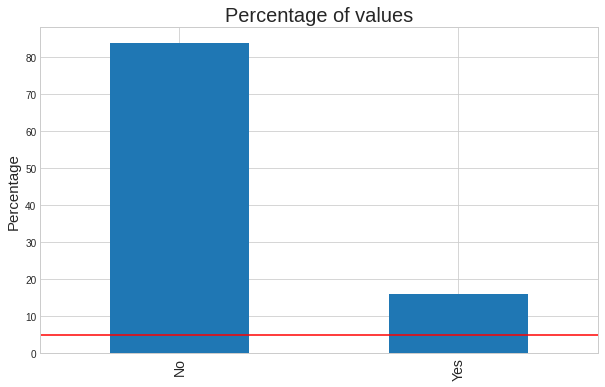

In [19]:
eda.feature_analysis(train,'Attrition')

In [20]:
train.Attrition = train.Attrition.apply(lambda x: 1 if x=='Yes' else 0)
test.Attrition = test.Attrition.apply(lambda x: 1 if x=='Yes' else 0)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,3,29,2,3,3,2,1,2,8,6
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,1,3,2,3,2,1,2,1,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,1,23,3,3,12,9,4,9,8,6
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,0,7,1,3,7,4,0,6,0,1
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,1,10,3,3,8,7,4,7,7,5


BusinessTravel

The feature BusinessTravel is CATEGORICAL

-Cardinality: 3
-Missing values in training set: 0


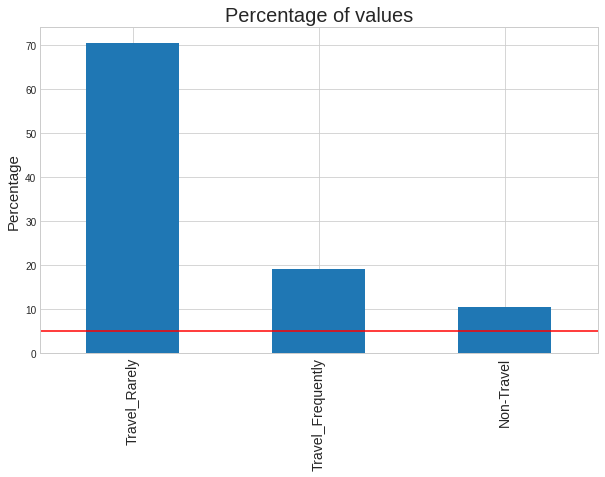

In [21]:
eda.feature_analysis(train,'BusinessTravel')

      BusinessTravel  Attrition
0         Non-Travel   0.073171
1  Travel_Frequently   0.253333
2      Travel_Rarely   0.149758


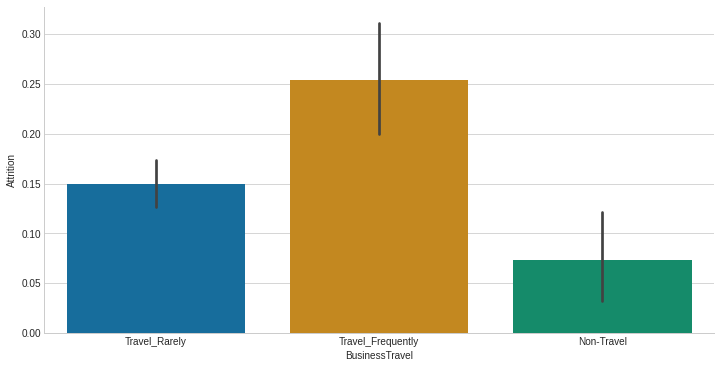

In [22]:
def compare_attrition(x):
    print(train[[x,"Attrition"]].groupby([x],as_index=False).mean())
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x=x,y="Attrition",data=train,ax=ax,palette='colorblind')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

compare_attrition("BusinessTravel")

DailyRate

The feature DailyRate is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


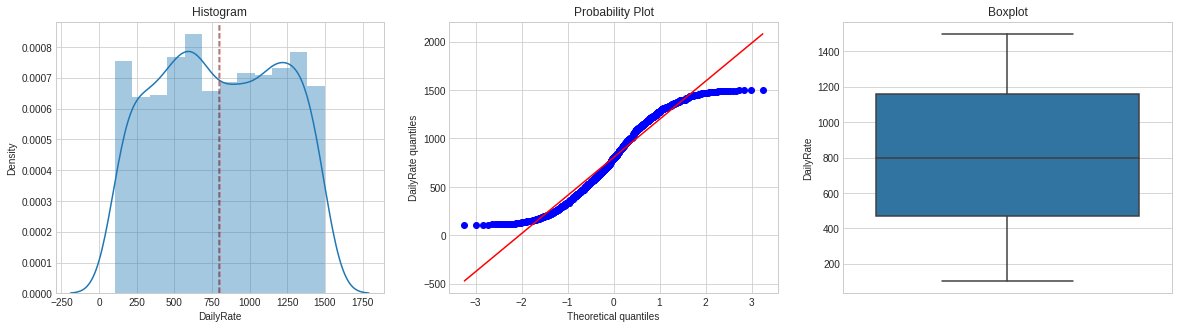

In [23]:
eda.feature_analysis(train,'DailyRate')


In [24]:
test["DailyRateFreq"] = fe.discretization(train,test,variables=['DailyRate'])['DailyRate']
train["DailyRateFreq"] = fe.discretization(train,train,variables=['DailyRate'])['DailyRate']
test["DailyRateRange"] = fe.discretization(train,test,variables=['DailyRate'],method="equalrange")['DailyRate']
train["DailyRateRange"] = fe.discretization(train,train,variables=['DailyRate'],method="equalrange")['DailyRate']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,2,3,3,2,1,2,8,6,8,8
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,2,3,2,1,2,1,0,0,3,3
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,3,3,12,9,4,9,8,6,2,2


Department

The feature Department is CATEGORICAL

-Cardinality: 3
-Missing values in training set: 0


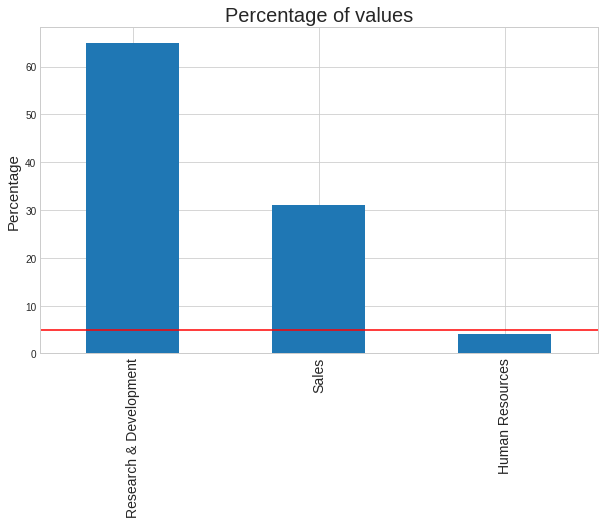

In [25]:
eda.feature_analysis(train,'Department')


               Department  Attrition
0         Human Resources   0.208333
1  Research & Development   0.136126
2                   Sales   0.208791


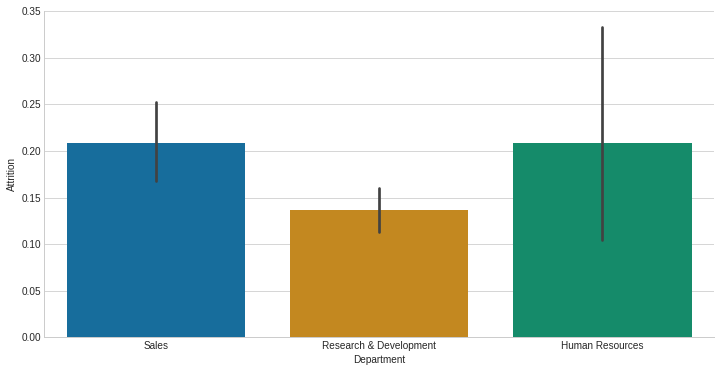

In [26]:
compare_attrition("Department")


DistanceFromHome

The feature DistanceFromHome is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


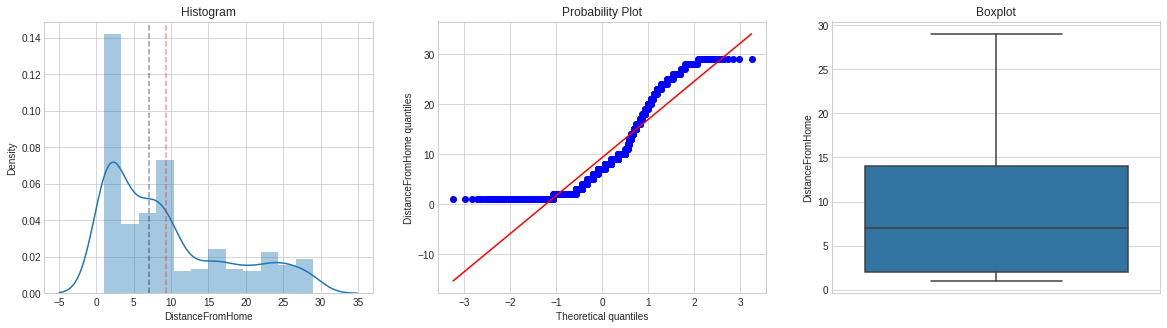

In [27]:
eda.feature_analysis(train,'DistanceFromHome')

    DistanceFromHome  Attrition
0                  1   0.107143
1                  2   0.147239
2                  3   0.137931
3                  4   0.145833
4                  5   0.142857
5                  6   0.127660
6                  7   0.136986
7                  8   0.136364
8                  9   0.208955
9                 10   0.147059
10                11   0.142857
11                12   0.333333
12                13   0.294118
13                14   0.157895
14                15   0.227273
15                16   0.250000
16                17   0.294118
17                18   0.100000
18                19   0.125000
19                20   0.052632
20                21   0.133333
21                22   0.294118
22                23   0.190476
23                24   0.416667
24                25   0.250000
25                26   0.136364
26                27   0.300000
27                28   0.100000
28                29   0.227273


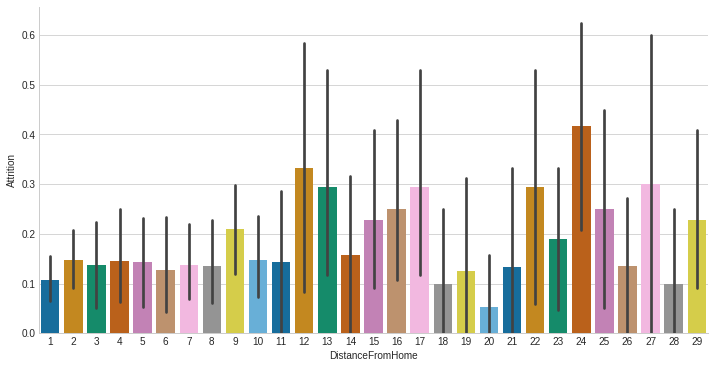

In [28]:
compare_attrition("DistanceFromHome")


In [29]:
test["DistanceFromHomeFreq"] = fe.discretization(train,test,variables=['DistanceFromHome'])['DistanceFromHome']
train["DistanceFromHomeFreq"] = fe.discretization(train,train,variables=['DistanceFromHome'])['DistanceFromHome']
test["DistanceFromHomeRange"] = fe.discretization(train,test,variables=['DistanceFromHome'],method="equalrange")['DistanceFromHome']
train["DistanceFromHomeRange"] = fe.discretization(train,train,variables=['DistanceFromHome'],method="equalrange")['DistanceFromHome']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,3,2,1,2,8,6,8,8,0,0
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,2,1,2,1,0,0,3,3,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,12,9,4,9,8,6,2,2,1,0


Education

The feature Education is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


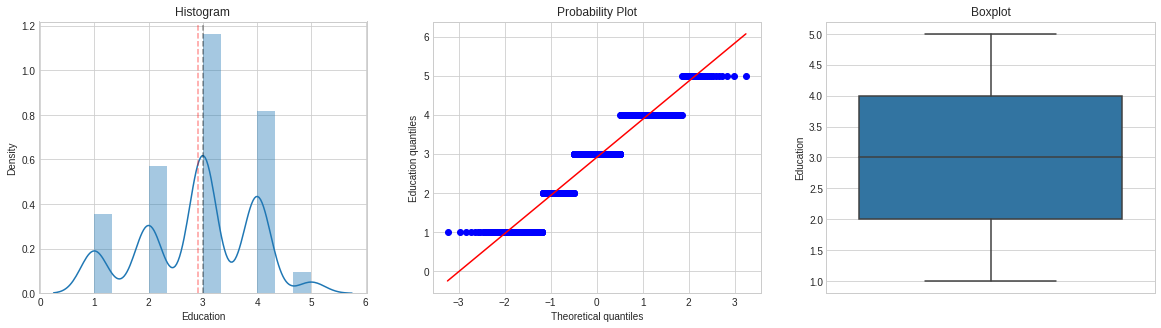

In [30]:
eda.feature_analysis(train,'Education')

   Education  Attrition
0          1   0.178571
1          2   0.142857
2          3   0.186813
3          4   0.140625
4          5   0.081081


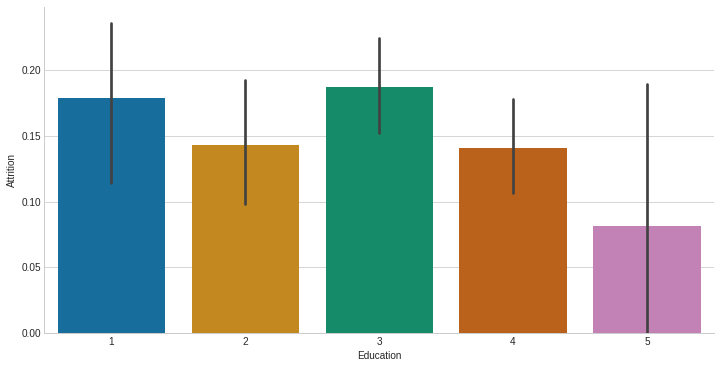

In [31]:
compare_attrition('Education')

In [32]:
test["EducationFreq"] = fe.discretization(train,test,variables=['Education'])['Education']
train["EducationFreq"] = fe.discretization(train,train,variables=['Education'])['Education']
test["EducationRange"] = fe.discretization(train,test,variables=['Education'],method="equalrange")['Education']
train["EducationRange"] = fe.discretization(train,train,variables=['Education'],method="equalrange")['Education']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,1,2,8,6,8,8,0,0,2,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,2,1,0,0,3,3,0,0,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,4,9,8,6,2,2,1,0,0,0


The feature EducationField is CATEGORICAL

-Cardinality: 6
-Missing values in training set: 0


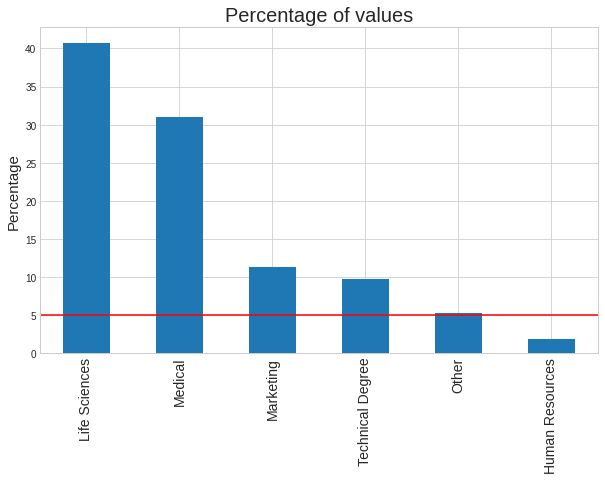

In [33]:
eda.feature_analysis(train,'EducationField')


EducationField

The feature EducationField is CATEGORICAL

-Cardinality: 6
-Missing values in training set: 0


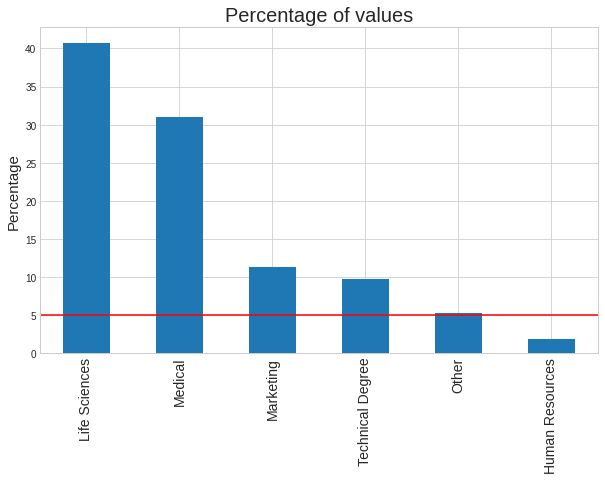

In [34]:
eda.feature_analysis(train,'EducationField')


     EducationField  Attrition
0   Human Resources   0.318182
1     Life Sciences   0.156576
2         Marketing   0.216418
3           Medical   0.134615
4             Other   0.080645
5  Technical Degree   0.217391


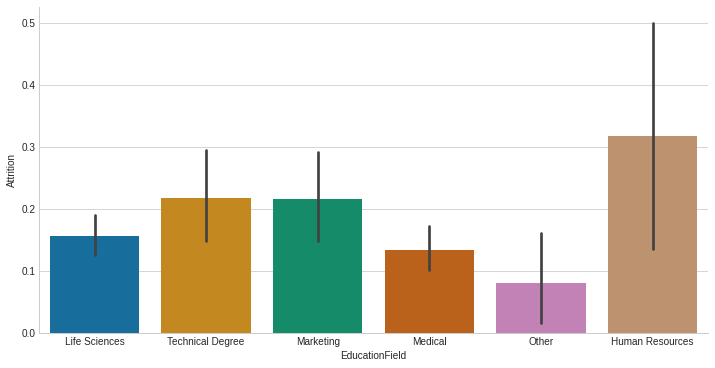

In [35]:
compare_attrition('EducationField')


EmployeeCount

The feature EmployeeCount is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


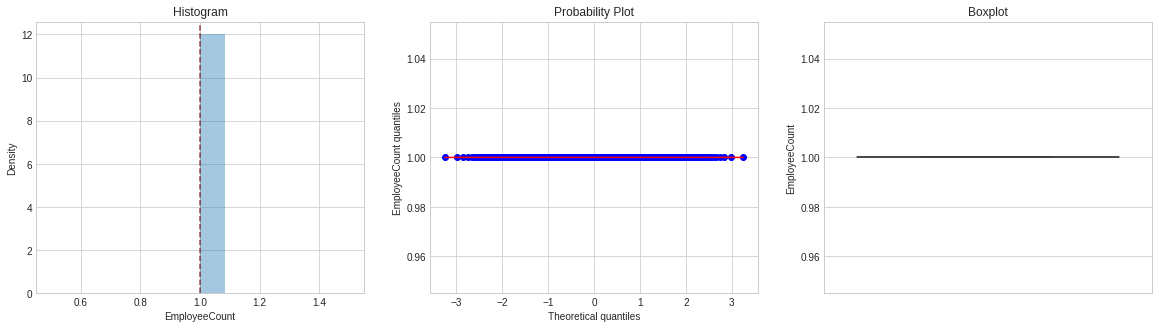

In [36]:
eda.feature_analysis(train,'EmployeeCount')


In [37]:
train.drop('EmployeeCount',axis=1,inplace=True)
test.drop('EmployeeCount',axis=1,inplace=True)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,1676,2,...,1,2,8,6,8,8,0,0,2,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,169,3,...,2,1,0,0,3,3,0,0,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1124,1,...,4,9,8,6,2,2,1,0,0,0
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,645,2,...,0,6,0,1,3,3,6,4,0,0
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,663,4,...,4,7,7,5,6,6,4,2,3,9


EmployeeNumber

The feature EmployeeNumber is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


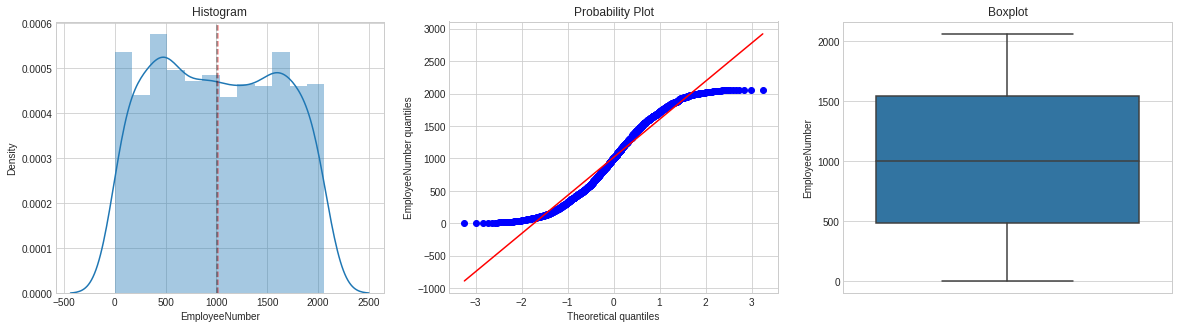

In [38]:
eda.feature_analysis(train,'EmployeeNumber')

In [39]:
train.drop('EmployeeNumber',axis=1,inplace=True)
test.drop('EmployeeNumber',axis=1,inplace=True)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,1,2,8,6,8,8,0,0,2,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,2,1,0,0,3,3,0,0,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,4,9,8,6,2,2,1,0,0,0
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,2,Male,...,0,6,0,1,3,3,6,4,0,0
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,...,4,7,7,5,6,6,4,2,3,9


EnvironmentSatisfaction

The feature EnvironmentSatisfaction is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


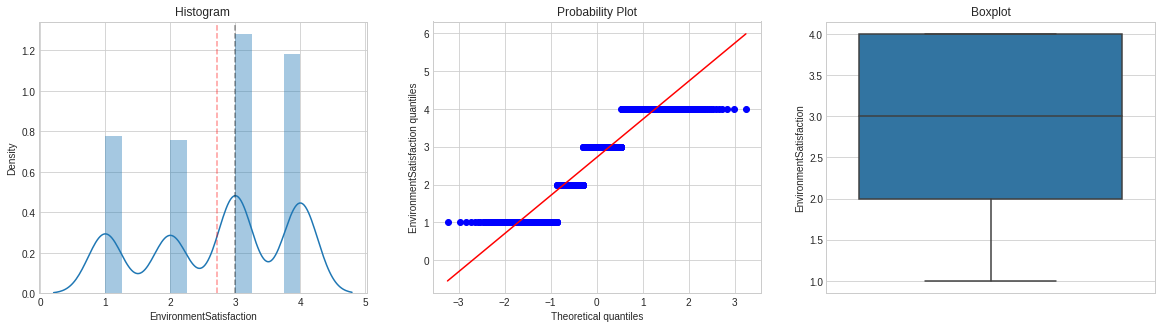

In [40]:
eda.feature_analysis(train,'EnvironmentSatisfaction')

   EnvironmentSatisfaction  Attrition
0                        1   0.257642
1                        2   0.147982
2                        3   0.143617
3                        4   0.126437


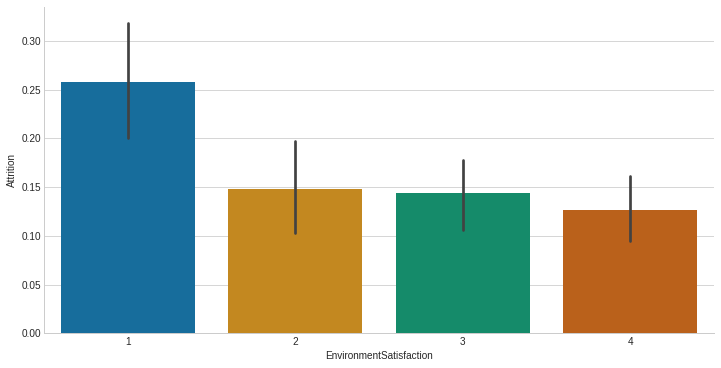

In [41]:
compare_attrition('EnvironmentSatisfaction')

Gender

The feature Gender is CATEGORICAL

-Cardinality: 2
-Missing values in training set: 0


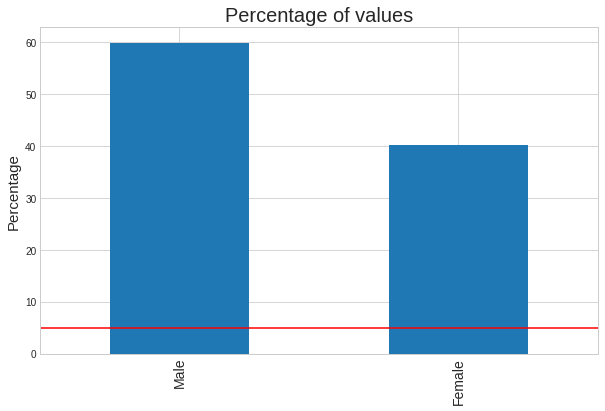

In [42]:
eda.feature_analysis(train,'Gender')


   Gender  Attrition
0  Female   0.150424
1    Male   0.169034


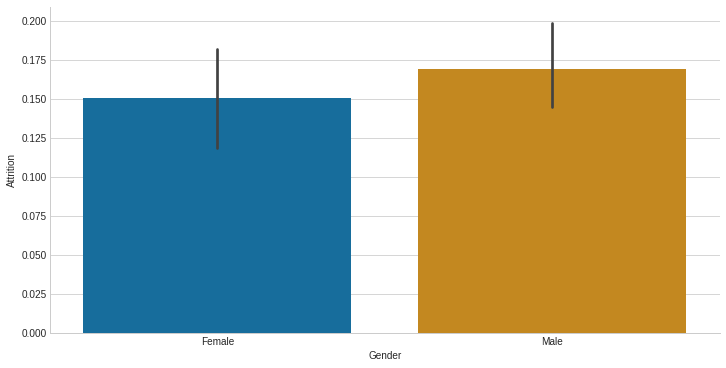

In [43]:
compare_attrition('Gender')


HourlyRate

The feature HourlyRate is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


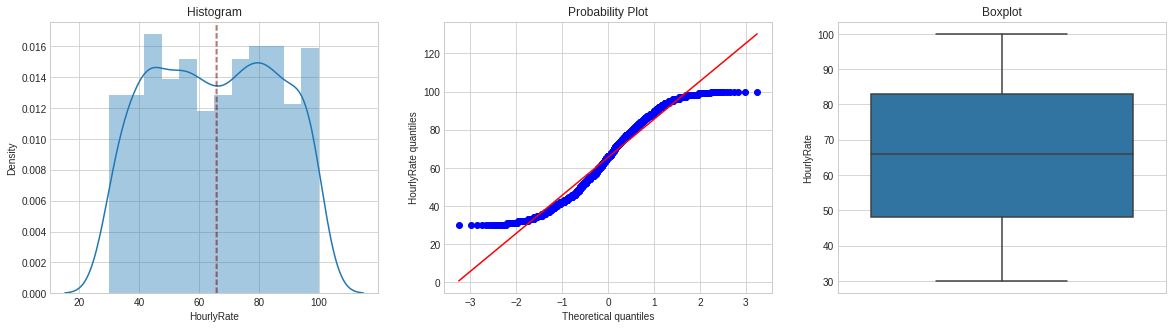

In [44]:
eda.feature_analysis(train,'HourlyRate')


In [45]:
test["HourlyRateFreq"] = fe.discretization(train,test,variables=['HourlyRate'])['HourlyRate']
train["HourlyRateFreq"] = fe.discretization(train,train,variables=['HourlyRate'])['HourlyRate']
test["HourlyRateRange"] = fe.discretization(train,test,variables=['HourlyRate'],method="equalrange")['HourlyRate']
train["HourlyRateRange"] = fe.discretization(train,train,variables=['HourlyRate'],method="equalrange")['HourlyRate']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,AgeFreq,AgeRange,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,8,6,8,8,0,0,2,7,2,2
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,3,3,0,0,0,0,9,9
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,8,6,2,2,1,0,0,0,2,3


The feature JobInvolvement is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


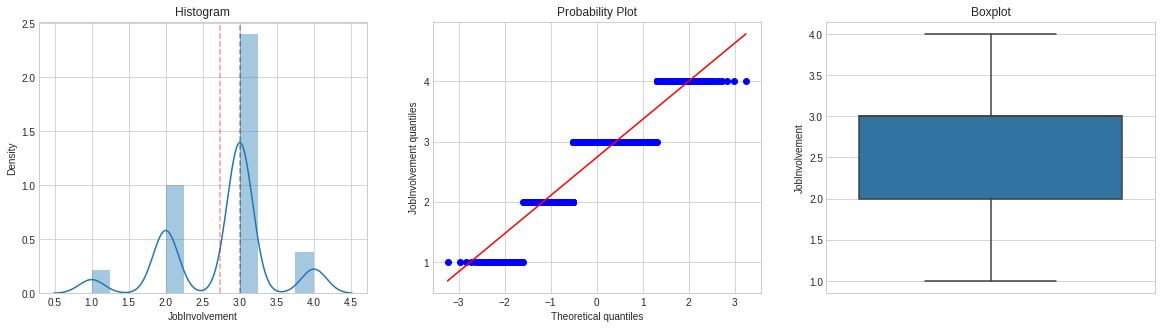

In [46]:
eda.feature_analysis(train,'JobInvolvement')

JobInvolvement

   JobInvolvement  Attrition
0               1   0.375000
1               2   0.176871
2               3   0.144681
3               4   0.106195


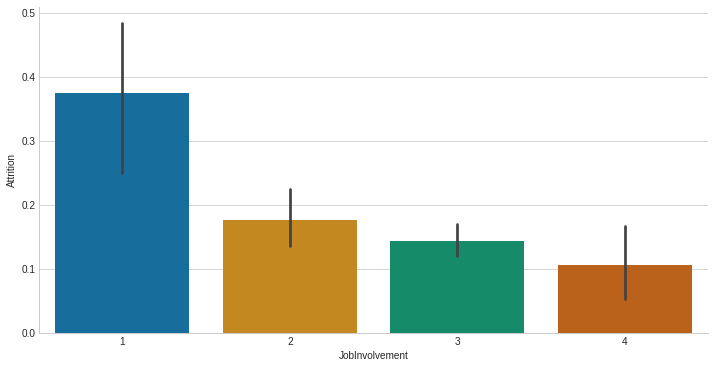

In [47]:
compare_attrition('JobInvolvement')

JobLevel

The feature JobLevel is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


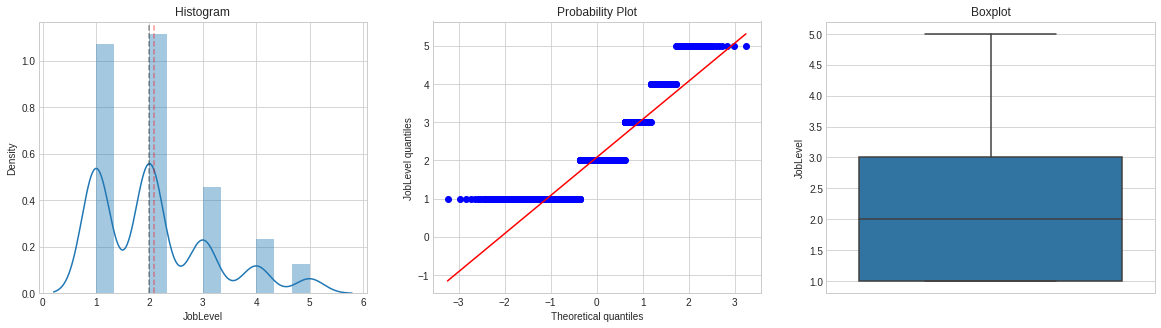

In [48]:
eda.feature_analysis(train,'JobLevel')

   JobLevel  Attrition
0         1   0.266667
1         2   0.098624
2         3   0.145251
3         4   0.054348
4         5   0.081633


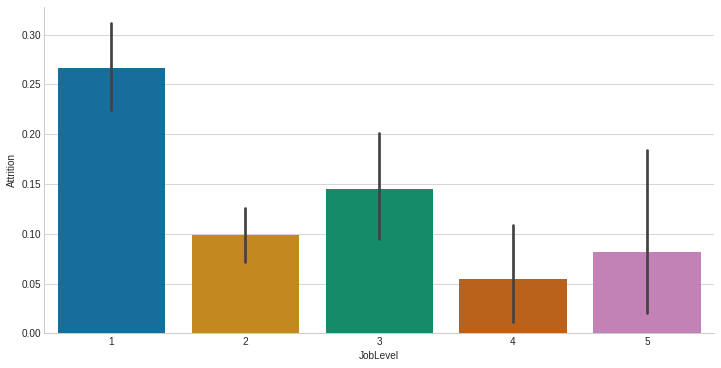

In [49]:
compare_attrition('JobLevel')

JobRole

The feature JobRole is CATEGORICAL

-Cardinality: 9
-Missing values in training set: 0


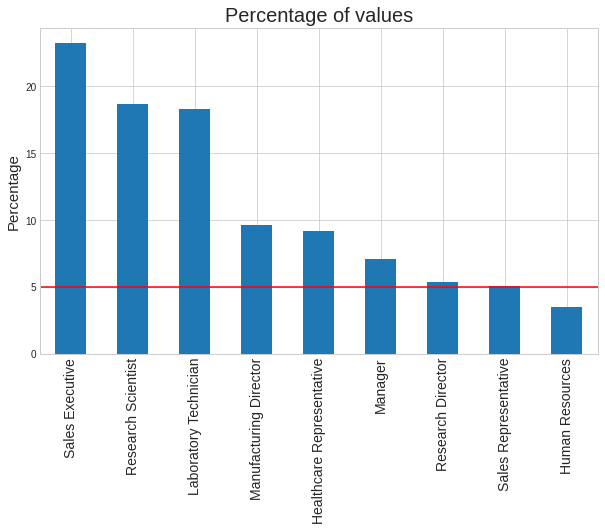

In [50]:
eda.feature_analysis(train,'JobRole')

                     JobRole  Attrition
0  Healthcare Representative   0.055556
1            Human Resources   0.243902
2      Laboratory Technician   0.269767
3                    Manager   0.060241
4     Manufacturing Director   0.061947
5          Research Director   0.015873
6         Research Scientist   0.131818
7            Sales Executive   0.179487
8       Sales Representative   0.416667


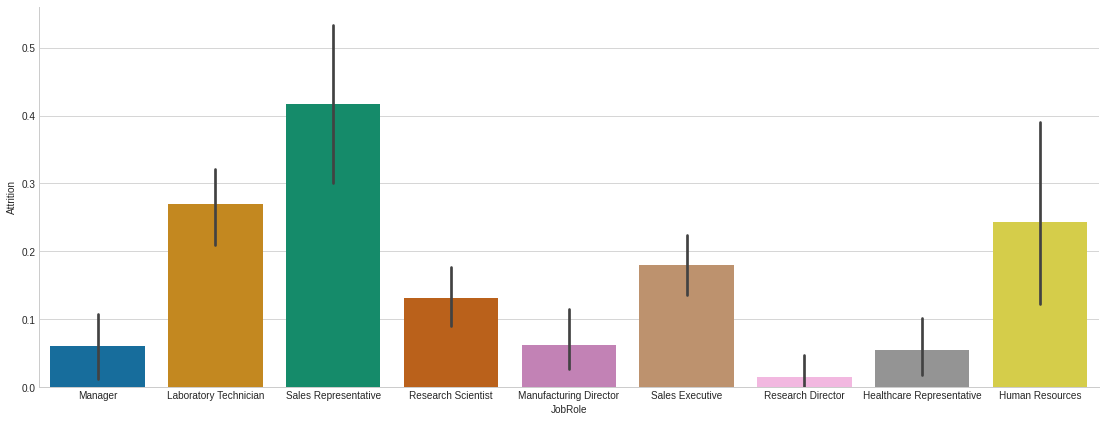

In [51]:
def compare_attrition_big(x):
    print(train[[x,"Attrition"]].groupby([x],as_index=False).mean())
    fig, ax = plt.subplots(figsize=(19,7))
    sns.barplot(x=x,y="Attrition",data=train,ax=ax,palette='colorblind')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

compare_attrition_big('JobRole')


JobSatisfaction

The feature JobSatisfaction is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


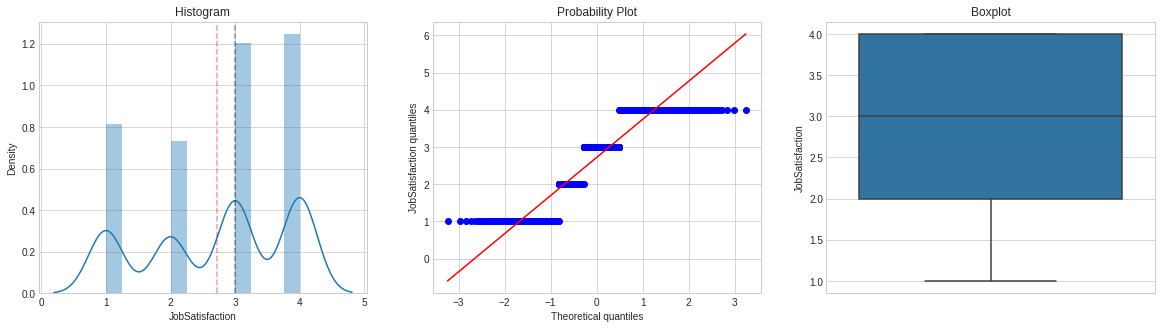

In [52]:
eda.feature_analysis(train,'JobSatisfaction')

   JobSatisfaction  Attrition
0                1   0.220833
1                2   0.175926
2                3   0.163842
3                4   0.112022


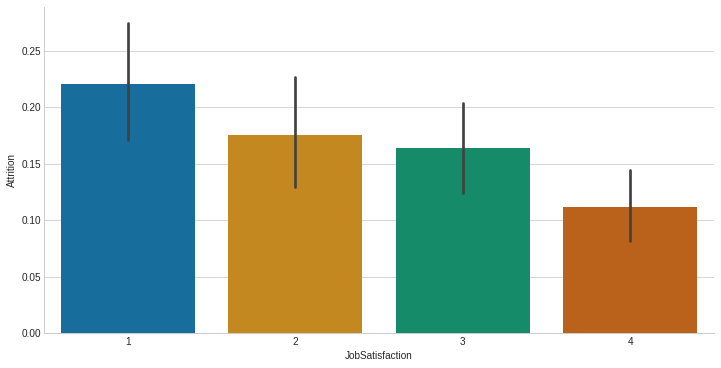

In [53]:
compare_attrition('JobSatisfaction')

The feature MaritalStatus is CATEGORICAL

-Cardinality: 3
-Missing values in training set: 0


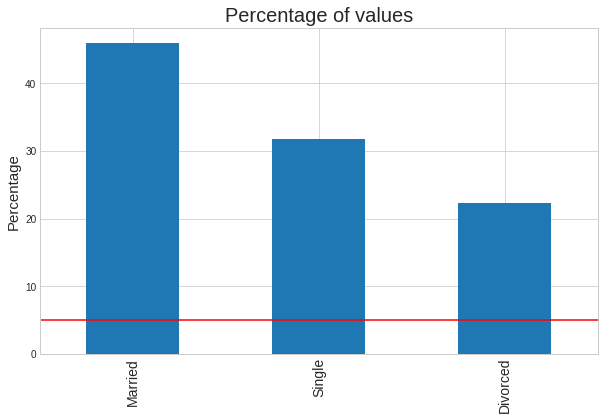

In [54]:
eda.feature_analysis(train,'MaritalStatus')

MaritalStatus

  MaritalStatus  Attrition
0      Divorced   0.110266
1       Married   0.122222
2        Single   0.254692


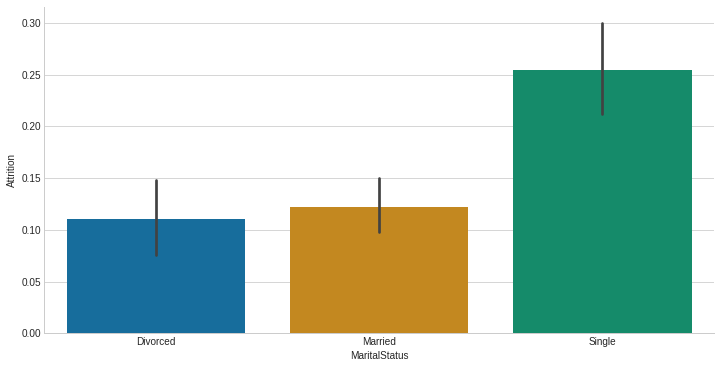

In [55]:
compare_attrition('MaritalStatus')

MonthlyIncome

The feature MonthlyIncome is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 86
-Outliers   3*IQR: 0


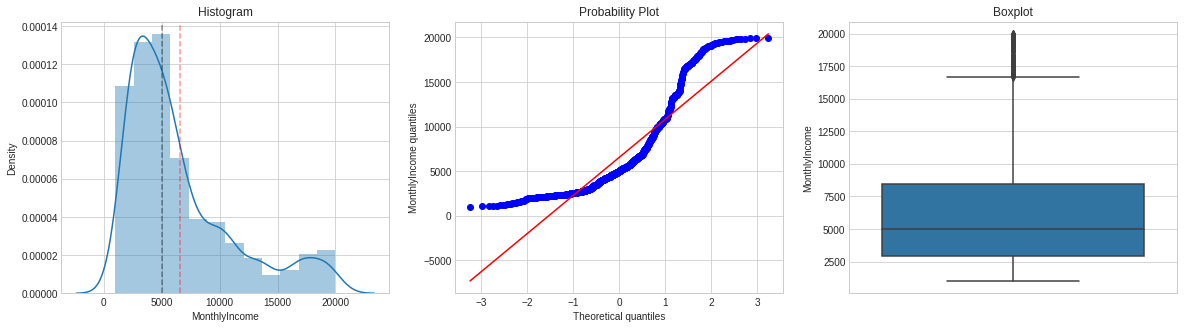

In [56]:
eda.feature_analysis(train,'MonthlyIncome')

In [57]:
test["MonthlyIncomeFreq"] = fe.discretization(train,test,variables=['MonthlyIncome'])['MonthlyIncome']
train["MonthlyIncomeFreq"] = fe.discretization(train,train,variables=['MonthlyIncome'])['MonthlyIncome']
test["MonthlyIncomeRange"] = fe.discretization(train,test,variables=['MonthlyIncome'],method="equalrange")['MonthlyIncome']
train["MonthlyIncomeRange"] = fe.discretization(train,train,variables=['MonthlyIncome'],method="equalrange")['MonthlyIncome']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,DailyRateFreq,DailyRateRange,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,8,8,0,0,2,7,2,2,9,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,3,3,0,0,0,0,9,9,1,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,2,2,1,0,0,0,2,3,9,8


MonthlyRate

The feature MonthlyRate is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


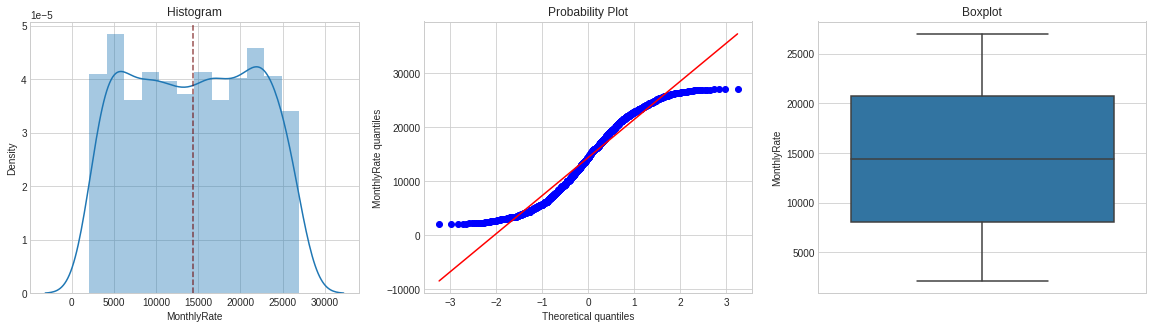

In [58]:
eda.feature_analysis(train,'MonthlyRate')

In [59]:
test["MonthlyRateFreq"] = fe.discretization(train,test,variables=['MonthlyRate'])['MonthlyRate']
train["MonthlyRateFreq"] = fe.discretization(train,train,variables=['MonthlyRate'])['MonthlyRate']
test["MonthlyRateRange"] = fe.discretization(train,test,variables=['MonthlyRate'],method="equalrange")['MonthlyRate']
train["MonthlyRateRange"] = fe.discretization(train,train,variables=['MonthlyRate'],method="equalrange")['MonthlyRate']
train.head(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,0,0,2,7,2,2,9,7,7,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,0,0,9,9,1,0,6,6
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,1,0,0,0,2,3,9,8,5,5


NumCompaniesWorked

The feature NumCompaniesWorked is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 36
-Outliers   3*IQR: 0


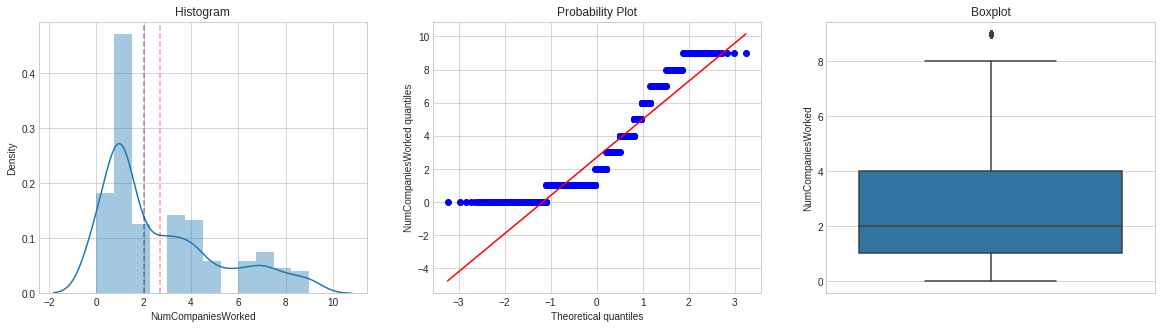

In [60]:
eda.feature_analysis(train,'NumCompaniesWorked')


   NumCompaniesWorked  Attrition
0                   0   0.081250
1                   1   0.202410
2                   2   0.108108
3                   3   0.095238
4                   4   0.127119
5                   5   0.269231
6                   6   0.196078
7                   7   0.257576
8                   8   0.146341
9                   9   0.194444


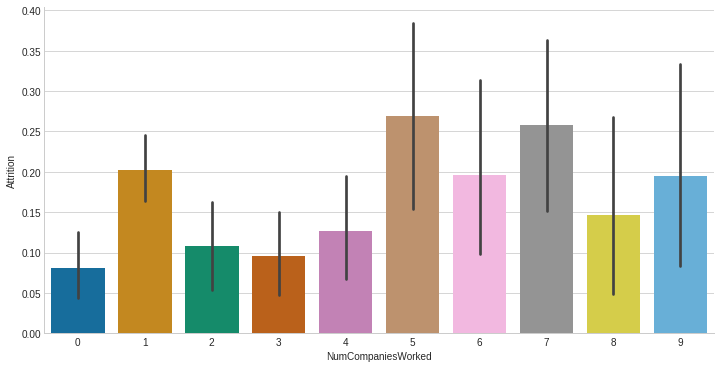

In [61]:
compare_attrition('NumCompaniesWorked')

Over18

The feature Over18 is CATEGORICAL

-Cardinality: 1
-Missing values in training set: 0


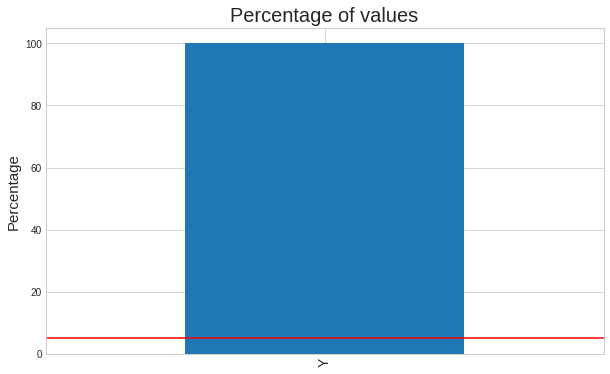

In [62]:
eda.feature_analysis(train,'Over18')

In [63]:
train.drop('Over18',axis=1,inplace=True)
test.drop('Over18',axis=1,inplace=True)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,0,0,2,7,2,2,9,7,7,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,0,0,9,9,1,0,6,6
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,1,0,0,0,2,3,9,8,5,5
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,2,Male,...,6,4,0,0,1,1,0,0,9,9
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,...,4,2,3,9,5,5,5,2,7,7


OverTime

The feature OverTime is CATEGORICAL

-Cardinality: 2
-Missing values in training set: 0


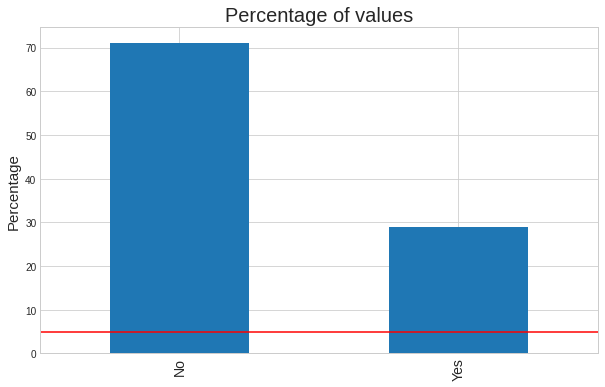

In [64]:
eda.feature_analysis(train,'OverTime')

In [65]:
train.OverTime = train.OverTime.apply(lambda x: 1 if x=='Yes' else 0)
test.OverTime = test.OverTime.apply(lambda x: 1 if x=='Yes' else 0)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,DistanceFromHomeFreq,DistanceFromHomeRange,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,0,0,2,7,2,2,9,7,7,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,0,0,9,9,1,0,6,6
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,1,0,0,0,2,3,9,8,5,5
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,2,Male,...,6,4,0,0,1,1,0,0,9,9
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,...,4,2,3,9,5,5,5,2,7,7


PercentSalaryHike

The feature PercentSalaryHike is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


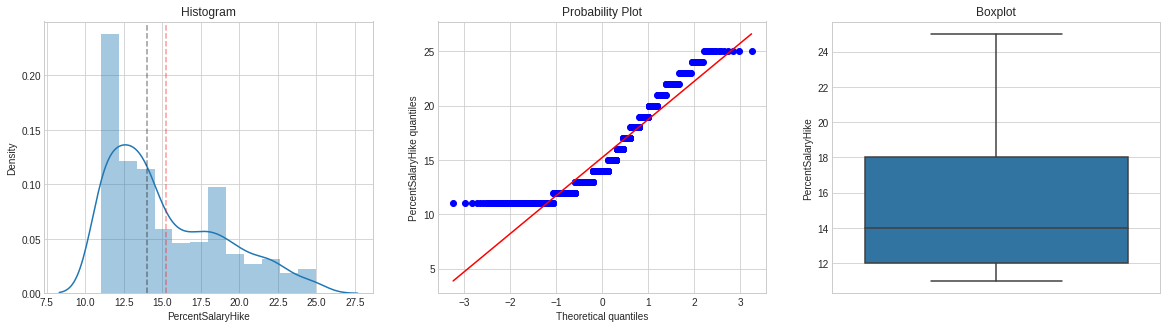

In [66]:
eda.feature_analysis(train,'PercentSalaryHike')

    PercentSalaryHike  Attrition
0                  11   0.202381
1                  12   0.151899
2                  13   0.179641
3                  14   0.096154
4                  15   0.172840
5                  16   0.206349
6                  17   0.156250
7                  18   0.166667
8                  19   0.112903
9                  20   0.122449
10                 21   0.135135
11                 22   0.209302
12                 23   0.240000
13                 24   0.266667
14                 25   0.062500


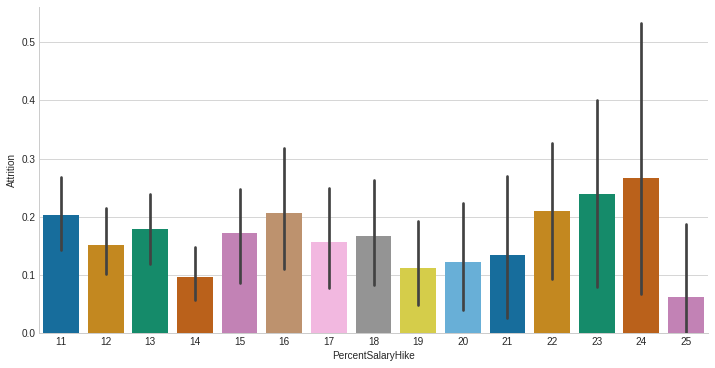

In [67]:
compare_attrition('PercentSalaryHike')

In [68]:
test["PercentSalaryHikeFreq"] = fe.discretization(train,test,variables=['PercentSalaryHike'])['PercentSalaryHike']
train["PercentSalaryHikeFreq"] = fe.discretization(train,train,variables=['PercentSalaryHike'])['PercentSalaryHike']
test["PercentSalaryHikeRange"] = fe.discretization(train,test,variables=['PercentSalaryHike'],method="equalrange")['PercentSalaryHike']
train["PercentSalaryHikeRange"] = fe.discretization(train,train,variables=['PercentSalaryHike'],method="equalrange")['PercentSalaryHike']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange,PercentSalaryHikeFreq,PercentSalaryHikeRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,2,7,2,2,9,7,7,7,2,2
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,9,9,1,0,6,6,2,2
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,0,0,2,3,9,8,5,5,0,0


PerformanceRating

The feature PerformanceRating is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 185
-Outliers   3*IQR: 185


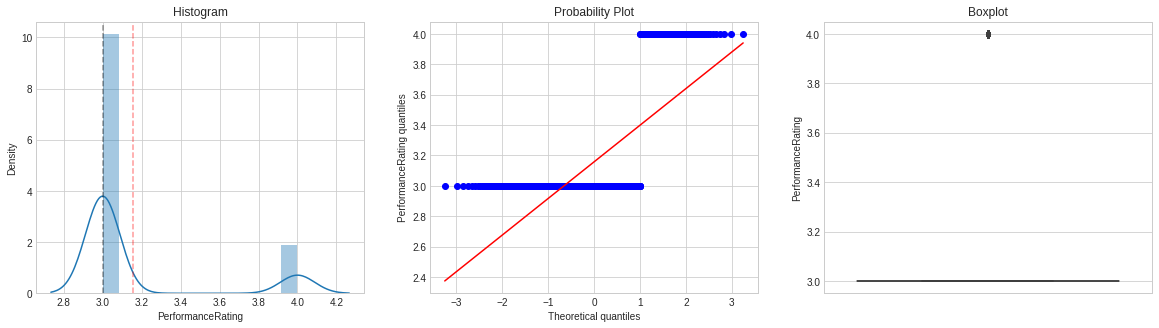

In [69]:
eda.feature_analysis(train,'PerformanceRating')

   PerformanceRating  Attrition
0                  3   0.160444
1                  4   0.167568


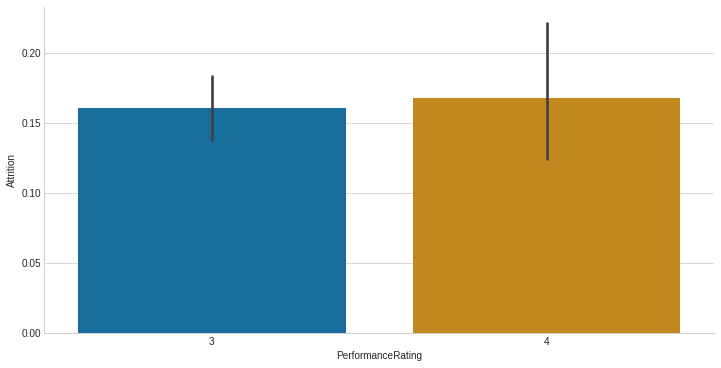

In [70]:
compare_attrition('PerformanceRating')

RelationshipSatisfaction

The feature RelationshipSatisfaction is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


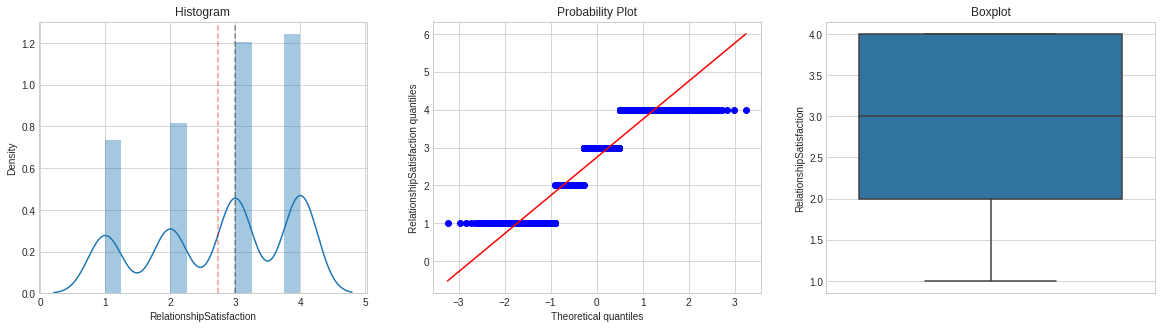

In [71]:
eda.feature_analysis(train,'RelationshipSatisfaction')

   RelationshipSatisfaction  Attrition
0                         1   0.199074
1                         2   0.154167
2                         3   0.160563
3                         4   0.145205


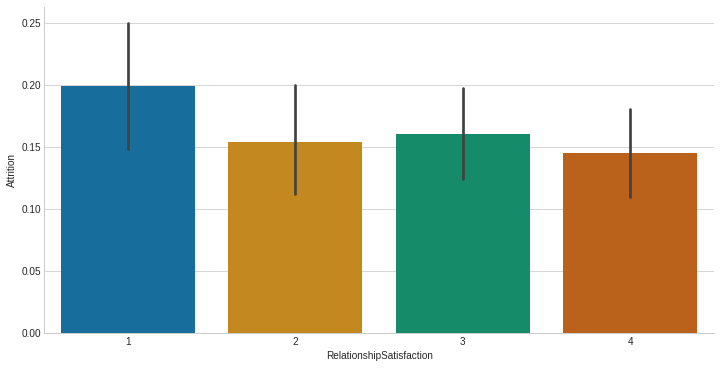

In [72]:
compare_attrition('RelationshipSatisfaction')

StandardHours

The feature StandardHours is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


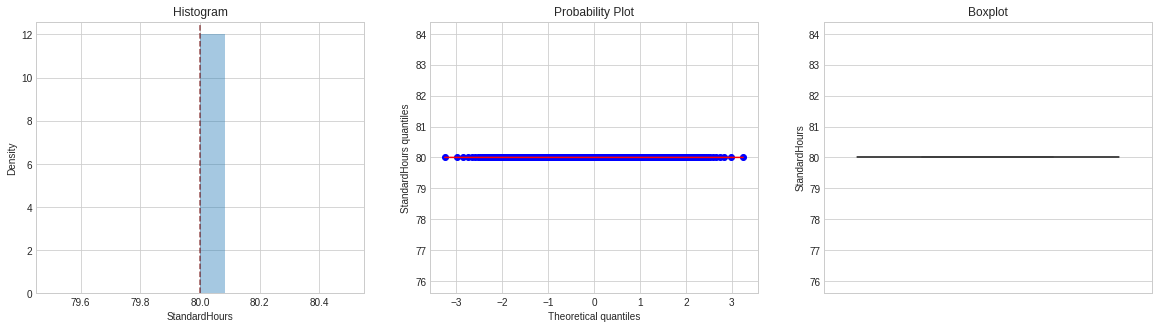

In [73]:
eda.feature_analysis(train,'StandardHours')

In [74]:
train.drop('StandardHours',axis=1,inplace=True)
test.drop('StandardHours',axis=1,inplace=True)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,EducationFreq,EducationRange,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange,PercentSalaryHikeFreq,PercentSalaryHikeRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,2,7,2,2,9,7,7,7,2,2
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,0,0,9,9,1,0,6,6,2,2
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,0,0,2,3,9,8,5,5,0,0
478,25,0,Travel_Rarely,622,Sales,13,1,Medical,2,Male,...,0,0,1,1,0,0,9,9,0,0
491,43,0,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,...,3,9,5,5,5,2,7,7,1,1


StockOptionLevel

The feature StockOptionLevel is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 66
-Outliers   3*IQR: 0


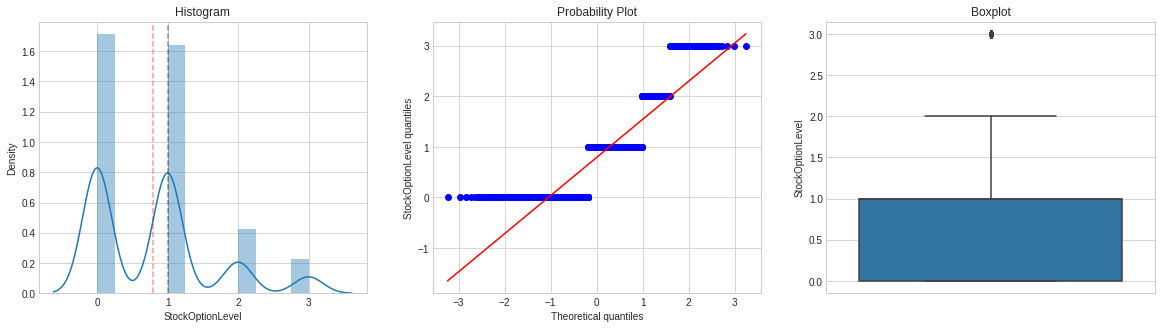

In [75]:
eda.feature_analysis(train,'StockOptionLevel')

   StockOptionLevel  Attrition
0                 0   0.242545
1                 1   0.099585
2                 2   0.080000
3                 3   0.151515


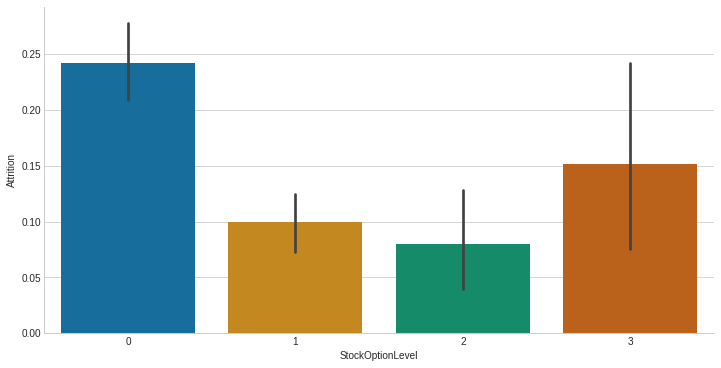

In [76]:
compare_attrition('StockOptionLevel')

TotalWorkingYears

The feature TotalWorkingYears is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 52
-Outliers   3*IQR: 0


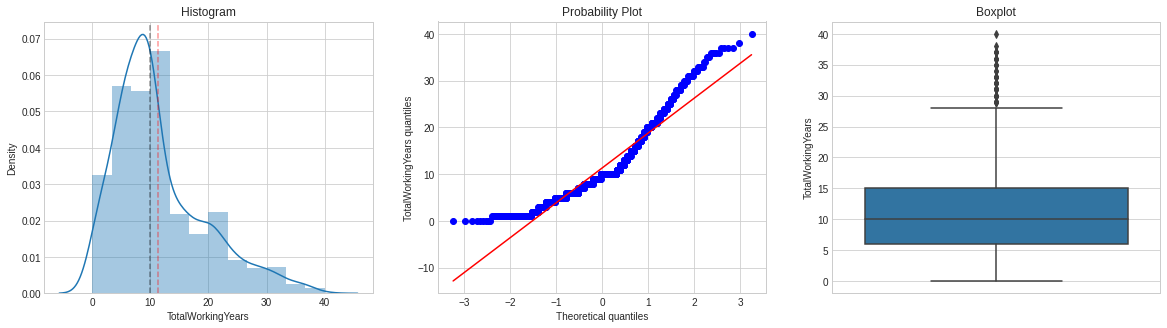

In [77]:
eda.feature_analysis(train,'TotalWorkingYears')

In [78]:
test["TotalWorkingYearsFreq"] = fe.discretization(train,test,variables=['TotalWorkingYears'])['TotalWorkingYears']
train["TotalWorkingYearsFreq"] = fe.discretization(train,train,variables=['TotalWorkingYears'])['TotalWorkingYears']
test["TotalWorkingYearsRange"] = fe.discretization(train,test,variables=['TotalWorkingYears'],method="equalrange")['TotalWorkingYears']
train["TotalWorkingYearsRange"] = fe.discretization(train,train,variables=['TotalWorkingYears'],method="equalrange")['TotalWorkingYears']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,HourlyRateFreq,HourlyRateRange,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange,PercentSalaryHikeFreq,PercentSalaryHikeRange,TotalWorkingYearsFreq,TotalWorkingYearsRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,2,2,9,7,7,7,2,2,8,7
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,9,9,1,0,6,6,2,2,0,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,2,3,9,8,5,5,0,0,7,5


TrainingTimesLastYear

The feature TrainingTimesLastYear is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 174
-Outliers   3*IQR: 0


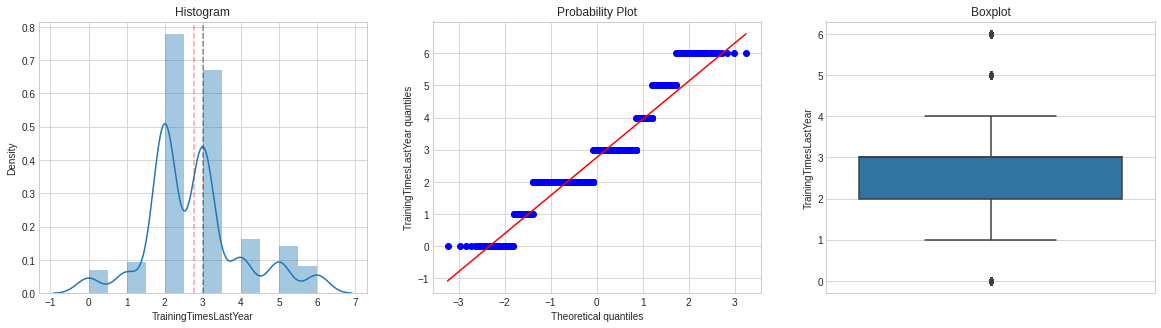

In [79]:
eda.feature_analysis(train,'TrainingTimesLastYear')

   TrainingTimesLastYear  Attrition
0                      0   0.268293
1                      1   0.125000
2                      2   0.177243
3                      3   0.134518
4                      4   0.221053
5                      5   0.130952
6                      6   0.122449


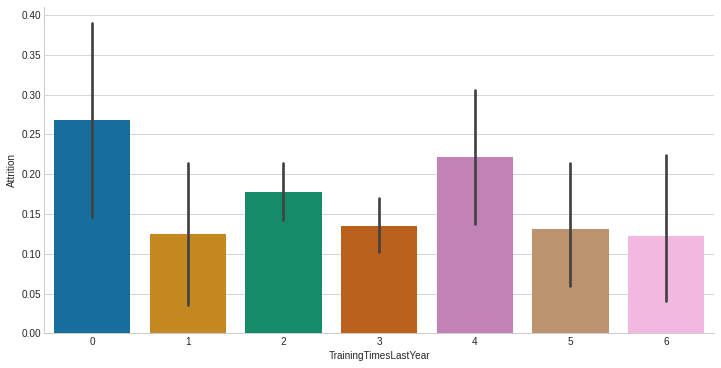

In [80]:
compare_attrition('TrainingTimesLastYear')

WorkLifeBalance

The feature WorkLifeBalance is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


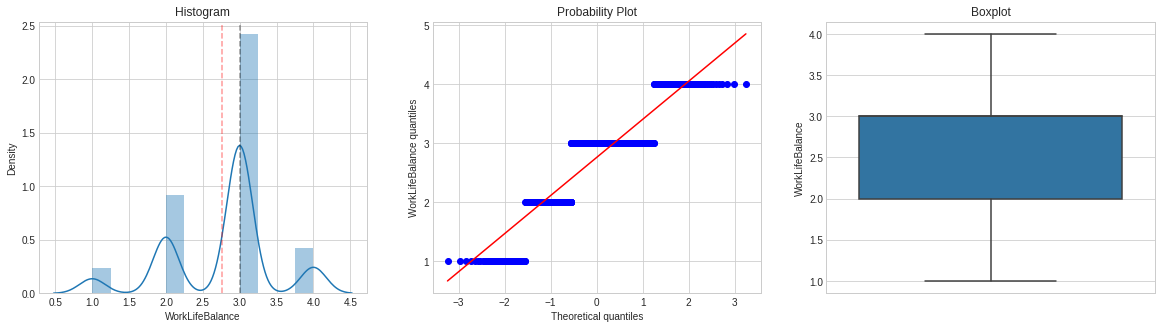

In [81]:
eda.feature_analysis(train,'WorkLifeBalance')

   WorkLifeBalance  Attrition
0                1   0.314286
1                2   0.181481
2                3   0.136428
3                4   0.176000


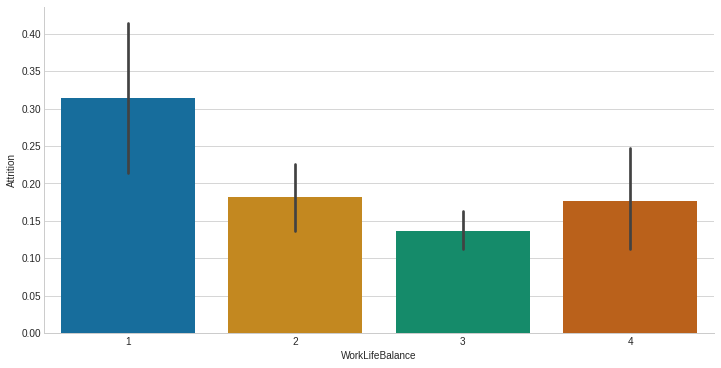

In [82]:
compare_attrition('WorkLifeBalance')

-YearsAtCompany

The feature YearsAtCompany is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 52
-Outliers   3*IQR: 9


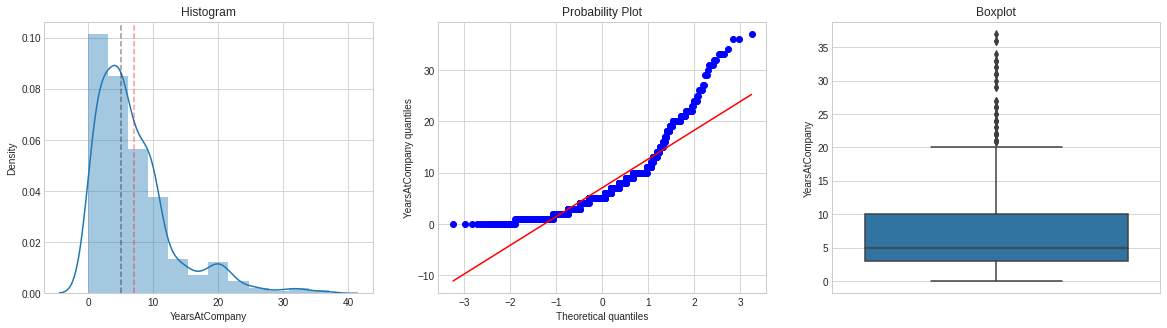

In [83]:
eda.feature_analysis(train,'YearsAtCompany')

In [84]:

test["YearsAtCompanyFreq"] = fe.discretization(train,test,variables=['YearsAtCompany'])['YearsAtCompany']
train["YearsAtCompanyFreq"] = fe.discretization(train,train,variables=['YearsAtCompany'])['YearsAtCompany']
test["YearsAtCompanyRange"] = fe.discretization(train,test,variables=['YearsAtCompany'],method="equalrange")['YearsAtCompany']
train["YearsAtCompanyRange"] = fe.discretization(train,train,variables=['YearsAtCompany'],method="equalrange")['YearsAtCompany']
train.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyIncomeFreq,MonthlyIncomeRange,MonthlyRateFreq,MonthlyRateRange,PercentSalaryHikeFreq,PercentSalaryHikeRange,TotalWorkingYearsFreq,TotalWorkingYearsRange,YearsAtCompanyFreq,YearsAtCompanyRange
1194,47,0,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,...,9,7,7,7,2,2,8,7,2,0
128,22,0,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,1,0,6,6,2,2,0,0,1,0
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,...,9,8,5,5,0,0,7,5,7,3


YearsInCurrentRole

The feature YearsInCurrentRole is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 16
-Outliers   3*IQR: 0


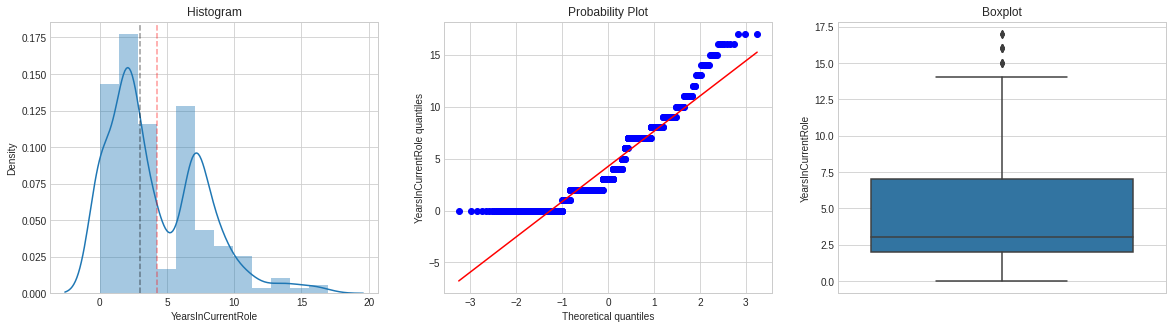

In [85]:
eda.feature_analysis(train,'YearsInCurrentRole')

    YearsInCurrentRole  Attrition
0                    0   0.322751
1                    1   0.200000
2                    2   0.166102
3                    3   0.133333
4                    4   0.136364
5                    5   0.035714
6                    6   0.035714
7                    7   0.145946
8                    8   0.083333
9                    9   0.074074
10                  10   0.041667
11                  11   0.000000
12                  12   0.166667
13                  13   0.125000
14                  14   0.111111
15                  15   0.166667
16                  16   0.000000
17                  17   0.000000


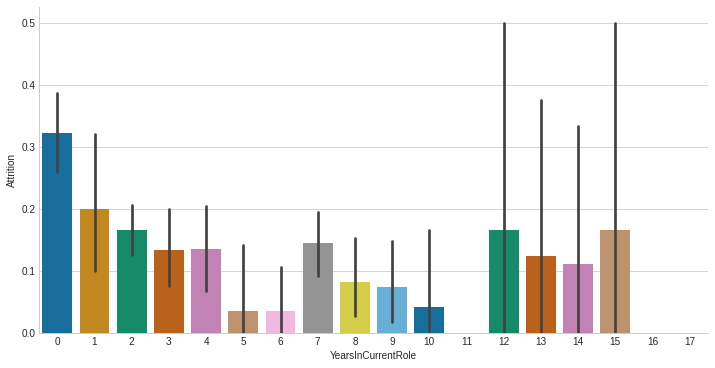

In [87]:
compare_attrition('YearsInCurrentRole')

YearsSinceLastPromotion

The feature YearsSinceLastPromotion is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 85
-Outliers   3*IQR: 25


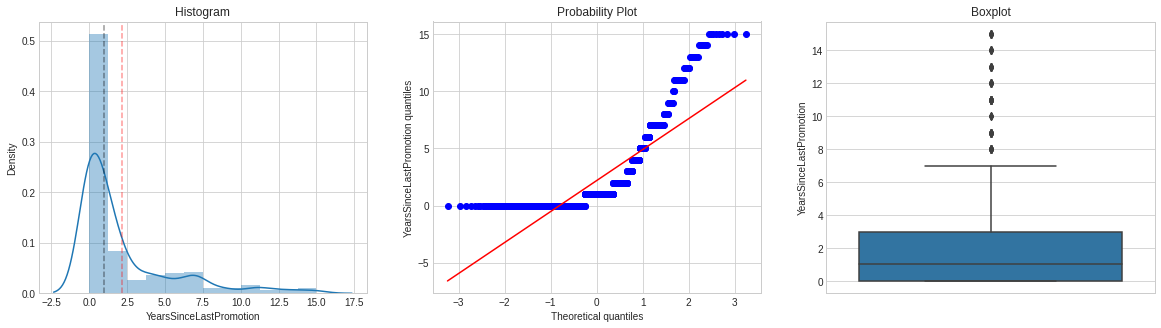

In [88]:
eda.feature_analysis(train,'YearsSinceLastPromotion')

    YearsSinceLastPromotion  Attrition
0                         0   0.199143
1                         1   0.125874
2                         2   0.161290
3                         3   0.200000
4                         4   0.076923
5                         5   0.057143
6                         6   0.160000
7                         7   0.209677
8                         8   0.000000
9                         9   0.214286
10                       10   0.333333
11                       11   0.100000
12                       12   0.000000
13                       13   0.222222
14                       14   0.142857
15                       15   0.111111


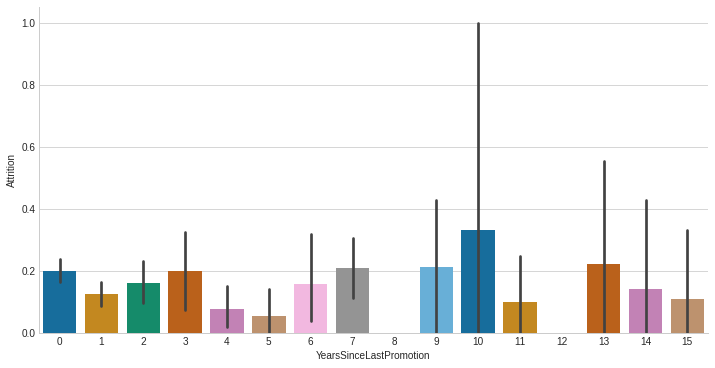

In [89]:
compare_attrition('YearsSinceLastPromotion')

YearsWithCurrManager

The feature YearsWithCurrManager is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 10
-Outliers   3*IQR: 0


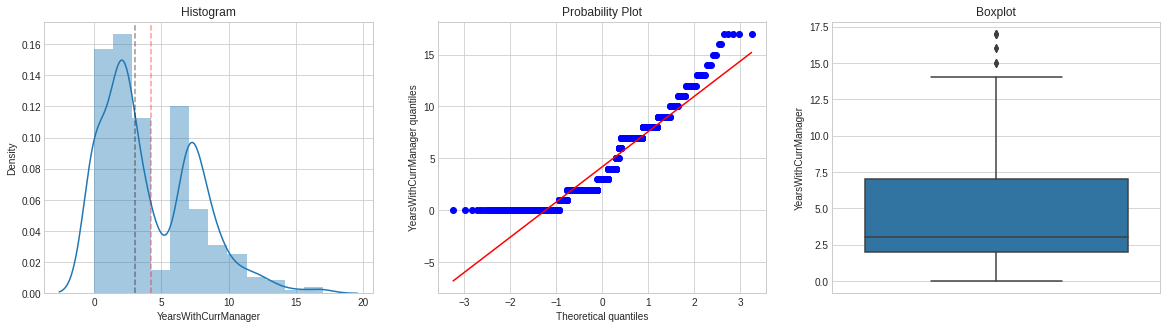

In [90]:
eda.feature_analysis(train,'YearsWithCurrManager')

    YearsWithCurrManager  Attrition
0                      0   0.354680
1                      1   0.172414
2                      2   0.129964
3                      3   0.137615
4                      4   0.101266
5                      5   0.120000
6                      6   0.086957
7                      7   0.146893
8                      8   0.088889
9                      9   0.076923
10                    10   0.125000
11                    11   0.055556
12                    12   0.000000
13                    13   0.000000
14                    14   0.500000
15                    15   0.000000
16                    16   0.000000
17                    17   0.000000


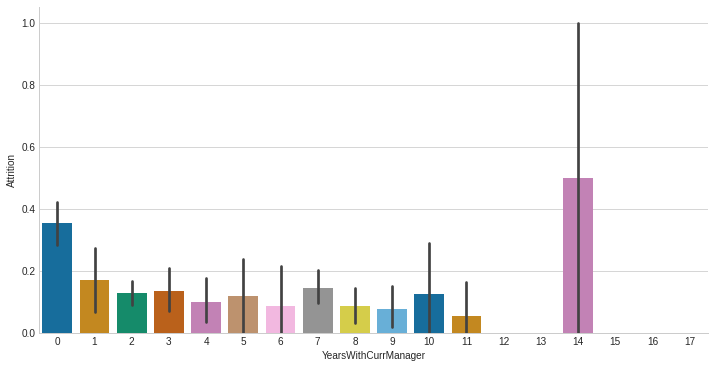

In [91]:
compare_attrition('YearsWithCurrManager')

In [92]:
test = fe.encoding(train,test,drop_last=False)
train = fe.encoding(train,train,drop_last=False)
train.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Representative,JobRole_Research Scientist,JobRole_Manufacturing Director,JobRole_Sales Executive,JobRole_Research Director,JobRole_Healthcare Representative,JobRole_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1194,47,0,1225,2,4,2,47,4,4,2,...,0,0,0,0,0,0,0,1,0,0
128,22,0,594,2,1,3,100,3,1,4,...,0,0,0,0,0,0,0,0,1,0
810,46,0,406,3,1,1,52,3,4,3,...,0,0,0,0,0,0,0,0,1,0
478,25,0,622,13,1,2,40,3,1,3,...,1,0,0,0,0,0,0,0,1,0
491,43,0,1001,9,5,4,72,3,2,3,...,0,0,0,0,0,0,0,1,0,0


Train the model

In [93]:
X_train = train.drop('Attrition',axis=1)
y_train = train.Attrition
X_test = test.drop('Attrition',axis=1)
y_test = test.Attrition

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1176, 70), (1176,), (294, 70), (294,))

In [94]:
X_train = fe.scale(X_train)
X_test = fe.scale(X_test)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Sales Representative,JobRole_Research Scientist,JobRole_Manufacturing Director,JobRole_Sales Executive,JobRole_Research Director,JobRole_Healthcare Representative,JobRole_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.690476,0.803725,0.035714,0.75,0.333333,0.242857,1.000000,0.75,0.333333,0.789021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.095238,0.351719,0.035714,0.00,0.666667,1.000000,0.666667,0.00,1.000000,0.079835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.217049,0.071429,0.00,0.000000,0.314286,0.666667,0.75,0.666667,0.867749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.166667,0.371777,0.428571,0.00,0.333333,0.142857,0.666667,0.00,0.666667,0.057319,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.595238,0.643266,0.285714,1.00,1.000000,0.600000,0.666667,0.25,0.666667,0.246256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


MODELS

TRY DIFFRENT MODELS

In [95]:
def confusion_plot():
    print(classification_report(y_test,predicted))
    matrix = confusion_matrix(y_test, predicted)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

GaussianNB

score: 0.6293495581631176


              precision    recall  f1-score   support

           0       0.90      0.60      0.72       247
           1       0.23      0.64      0.34        47

    accuracy                           0.60       294
   macro avg       0.56      0.62      0.53       294
weighted avg       0.79      0.60      0.66       294



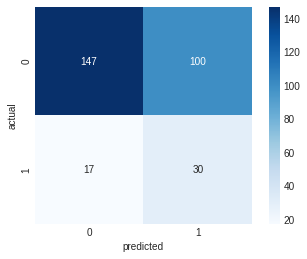

In [97]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

gnb = GaussianNB()
gnb.fit(X_train, y_train)

with open('Naive Bayes.pickle', mode='wb') as fp:
    pickle.dump(gnb, fp)
    
print(f'score: {cross_val_score(gnb,X_train,y_train,cv=10).mean()}\n\n')

predicted=gnb.predict(X_test)

confusion_plot()

LogisticRegression

score: 0.8860712733594089


              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.67      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.78      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294



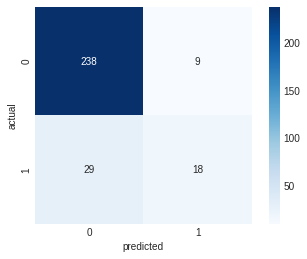

In [98]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

with open('Logistic Regression.pickle', mode='wb') as fp:
    pickle.dump(logistic_regression, fp)

print(f'score: {cross_val_score(logistic_regression,X_train,y_train,cv=10).mean()}\n\n')

predicted=logistic_regression.predict(X_test)

confusion_plot()

SVC Support Vector Classifier

NB score: 0.876749239461104


score: 0.8647979139504564


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



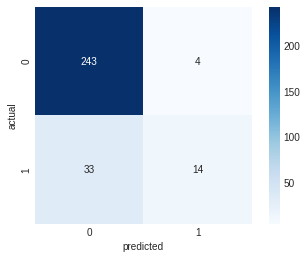

In [99]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)

with open('Support Vector Machine.pickle', mode='wb') as fp:
    pickle.dump(svm, fp)
    
print(f'NB score: {cross_val_score(svm,X_train,y_train,cv=10).mean()}\n\n')

svm2 = SVC(kernel='rbf', C=1.0, random_state=0)
svm2.fit(X_train, y_train)

print(f'score: {cross_val_score(svm2,X_train,y_train,cv=10).mean()}\n\n')

predicted=svm.predict(X_test)

confusion_plot()

KNeighborsClassifier

score: 0.8401564537157757


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



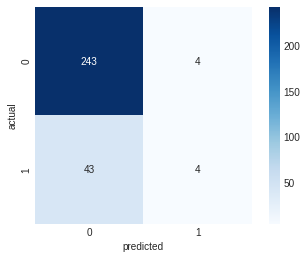

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

with open('Nearest Neighbors.pickle', mode='wb') as fp:
    pickle.dump(knn, fp)
    
print(f'score: {cross_val_score(knn,X_train,y_train,cv=10).mean()}\n\n')

predicted=knn.predict(X_test)

confusion_plot()


DecisionTreeClassifier

score: 0.7950456323337679


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       247
           1       0.23      0.23      0.23        47

    accuracy                           0.76       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.76      0.76      0.76       294



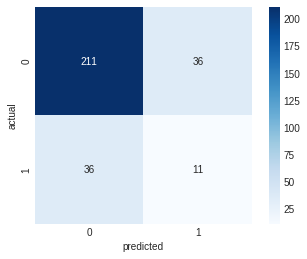

In [101]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_tree.fit(X_train, y_train)

with open('Decision Tree.pickle', mode='wb') as fp:
    pickle.dump(decision_tree, fp)
    
print(f'score: {cross_val_score(decision_tree,X_train,y_train,cv=10).mean()}\n\n')

predicted=decision_tree.predict(X_test)

confusion_plot()

RandomForestClassifier

score: 0.8562726350861943


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



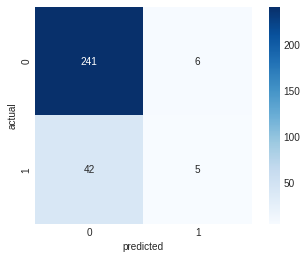

In [102]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)

with open('Random Forest.pickle', mode='wb') as fp:
    pickle.dump(random_forest, fp)
    
print(f'score: {cross_val_score(random_forest,X_train,y_train,cv=10).mean()}\n\n')

predicted=random_forest.predict(X_test)


confusion_plot()

GradientBoostingClassifier

score: 0.8639576995509198


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.67      0.21      0.32        47

    accuracy                           0.86       294
   macro avg       0.77      0.60      0.62       294
weighted avg       0.84      0.86      0.82       294



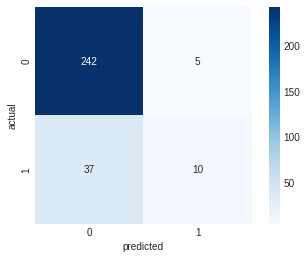

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

with open('Gradient Boosting.pickle', mode='wb') as fp:
    pickle.dump(gb, fp)
    
print(f'score: {cross_val_score(gb,X_train,y_train,cv=10).mean()}\n\n')

predicted=gb.predict(X_test)


confusion_plot()

Analyse results

In [104]:
names = ["Support Vector Machine", "Logistic Regression", "Nearest Neighbors",
         "Decision Tree","Random Forest", "Naive Bayes","Gradient Boosting"]
result = []

print("For guessing the Survived feature we used the following models:")
print()

for name in names:
    with open(name + '.pickle', 'rb') as fp:
        clf = pickle.load(fp)    
    clf.fit(X_train, y_train)
    score1 = cross_val_score(clf,X_train,y_train,cv=10).mean()
    score2 = cross_val_score(clf,X_test,y_test,cv=10).mean()
    result.append([score1, score2])
    
    print(name)

df_result = pd.DataFrame(result, columns=['Train', 'Test'], index = names)
df_result.sort_values("Test",ascending=False)

For guessing the Survived feature we used the following models:

Support Vector Machine
Logistic Regression
Nearest Neighbors
Decision Tree
Random Forest
Naive Bayes
Gradient Boosting


,Train,Test
Logistic Regression,0.886071,0.864023
Random Forest,0.856273,0.847126
Support Vector Machine,0.876749,0.846897
Nearest Neighbors,0.840156,0.819885
Gradient Boosting,0.863103,0.813103
Decision Tree,0.795046,0.751034
Naive Bayes,0.629350,0.286207


In [105]:
logpredtrain = LogisticRegression().fit(X_train,y_train).predict(X_train)
logpredtest = LogisticRegression().fit(X_train,y_train).predict(X_test)

knnpredtrain = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski').fit(X_train,y_train).predict(X_train)
knnpredtest = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski').fit(X_train,y_train).predict(X_test)

svmpredtrain = SVC(kernel='linear', C=1.0, random_state=0).fit(X_train,y_train).predict(X_train)
svmpredtest = SVC(kernel='linear', C=1.0, random_state=0).fit(X_train,y_train).predict(X_test)

rfpredtrain = RandomForestClassifier(random_state=0).fit(X_train,y_train).predict(X_train)
rfpredtest = RandomForestClassifier(random_state=0).fit(X_train,y_train).predict(X_test)

Results:
LogisticRegression 0.8860712733594089
SVC  0.8647979139504564
GradientBoostingClassifier 0.8639576995509198
RandomForestClassifier 0.8562726350861943
KNeighborsClassifier 0.8401564537157757
DecisionTreeClassifier 0.7950456323337679
GaussianNB 0.6293495581631176

we choose LogisticRegression
LogisticRegression

In [106]:
totrain = np.column_stack((X_train,logpredtrain,knnpredtrain,svmpredtrain,rfpredtrain))
totest = np.column_stack((X_test,logpredtest,knnpredtest,svmpredtest,rfpredtest))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



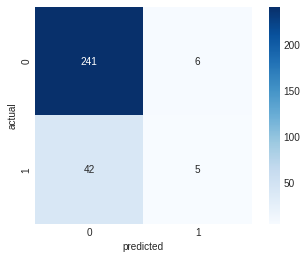

In [118]:
gb = LogisticRegression()
gb.fit(totrain, y_train)

predicted=gb.predict(totest)

confusion_plot()

In [119]:
trainANN = X_train.copy()
trainANN['Attrition'] = y_train

testANN = X_test.copy()
trainANN.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Scientist,JobRole_Manufacturing Director,JobRole_Sales Executive,JobRole_Research Director,JobRole_Healthcare Representative,JobRole_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,0.690476,0.803725,0.035714,0.75,0.333333,0.242857,1.000000,0.75,0.333333,0.789021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.095238,0.351719,0.035714,0.00,0.666667,1.000000,0.666667,0.00,1.000000,0.079835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.666667,0.217049,0.071429,0.00,0.000000,0.314286,0.666667,0.75,0.666667,0.867749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,0.166667,0.371777,0.428571,0.00,0.333333,0.142857,0.666667,0.00,0.666667,0.057319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,0.595238,0.643266,0.285714,1.00,1.000000,0.600000,0.666667,0.25,0.666667,0.246256,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [120]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(70,)))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               35500     
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 1)                 501       
                                                                 
Total params: 787,501
Trainable params: 787,501
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

epoch_hist = model.fit(X_train,y_train,epochs=100,batch_size=50)


Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 0.4413 - accuracy: 0.8231
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.3417 - accuracy: 0.8588
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.3050 - accuracy: 0.8920
Epoch 4/100
24/24 [==============================] - 0s 14ms/step - loss: 0.2795 - accuracy: 0.9022
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.2245 - accuracy: 0.9150
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.2041 - accuracy: 0.9201
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.1741 - accuracy: 0.9388
Epoch 8/100
24/24 [==============================] - 0s 15ms/step - loss: 0.1502 - accuracy: 0.9447
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 0.1265 - accuracy: 0.9490
Epoch 10/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0986 - accuracy: 0.9677

In [122]:
predicted = model.predict(X_test)
pd.DataFrame(predicted).head()

,0
0,1.029813e-08
1,9.459660e-14
2,7.260510e-12
3,6.630622e-19
4,9.998772e-01


In [123]:
pred_bool = (predicted>0.5)
pd.DataFrame(pred_bool).head()

,0
0,False
1,False
2,False
3,False
4,True


Loss Function

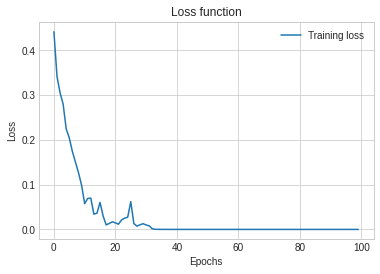

In [124]:
plt.plot(epoch_hist.history['loss'])
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss'])
plt.show()

Accuracy

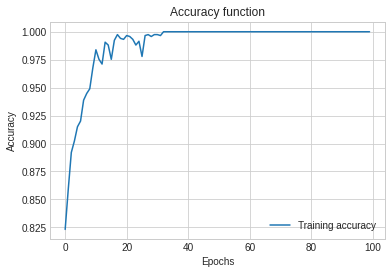

In [125]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('Accuracy function')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy'])
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.48      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294



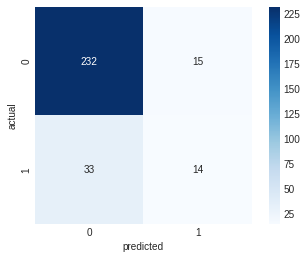

In [126]:
print(classification_report(y_test,pred_bool))
matrix = confusion_matrix(y_test, pred_bool)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()